# PSM for coral d18O

In this tutorial, we introduce the PSM for coral d18O in `p2k`.

In [1]:
%load_ext autoreload
%autoreload 2

import p2k
import pandas as pd
import numpy as np
import os

import warnings
warnings.filterwarnings('ignore')

## Data preparation

### Proxy

In [2]:
df = pd.read_pickle('./data/pages2k_dataset.pkl')
pdb = p2k.ProxyDatabase().from_df(df)

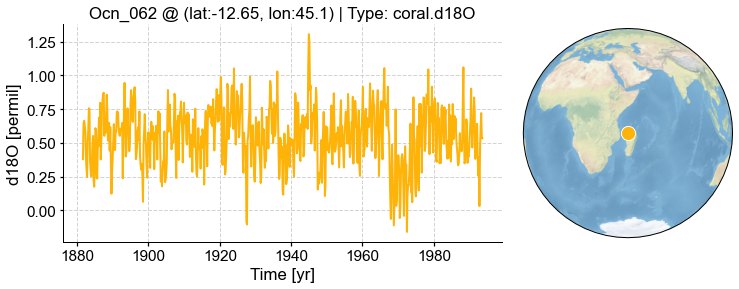

In [3]:
pdb_sub = pdb.filter(by='ptype', keys=['coral.d18O'])
pobj = pdb_sub.records['Ocn_062']
fig, ax = pobj.plot()

### Model

In [4]:
%%time
dirpath = '/Volumes/ExtraDrive/Data/GCM_sims/icesm_last_millennium_historical'

model_tos = p2k.ClimateField().load_nc(os.path.join(dirpath, 'tos_sfc_Omon_iCESM_past1000historical_085001-200512_interp.nc'))
model_d18Osw = p2k.ClimateField().load_nc(os.path.join(dirpath, 'd18Osw_sfc_Omon_iCESM_past1000historical_085001-200512_interp.nc'))

CPU times: user 2.87 s, sys: 18.9 ms, total: 2.89 s
Wall time: 2.9 s


## Get climate data for a specific `ProxyRecord`

In [5]:
%%time

pobj.del_clim()
pobj.get_clim(model_tos, tag='model')
pobj.get_clim(model_d18Osw, tag='model')

ProxyRecord.clim deleted for Ocn_062.
ProxyRecord.clim["model_tos"] created.
ProxyRecord.clim["model_d18Osw"] created.
CPU times: user 89.5 ms, sys: 235 ms, total: 324 ms
Wall time: 324 ms


## Create a PSM object

In [6]:
mdl = p2k.psm.Coral_d18O(pobj)

In [7]:
%%time
pp = mdl.forward()

CPU times: user 486 µs, sys: 267 µs, total: 753 µs
Wall time: 461 µs


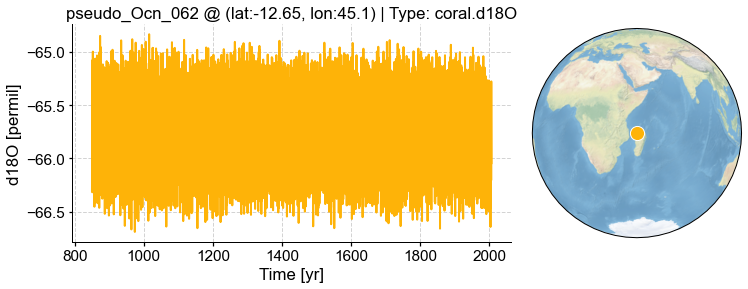

In [8]:
fig, ax = pp.plot()